In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib
import tensorflow as tf
from tensorflow import keras

In [2]:
# Deep learning - Hand-written digits classification
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
# Scale the input
X_train = X_train/255
X_test = X_test/255

In [4]:
len(X_train)

60000

In [5]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

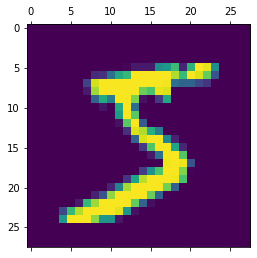

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [9]:
# Flatten the X to a single dimensional array
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

print(X_train_flattened.shape)
print(X_test_flattened.shape)

(60000, 784)
(10000, 784)


In [10]:
# Create a simple neuron network with 2 layer: input and output layer

model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7260 - accuracy: 0.8107
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3109 - accuracy: 0.9131
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2865 - accuracy: 0.9204
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2697 - accuracy: 0.9234
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2696 - accuracy: 0.9266
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2604 - accuracy: 0.9272
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2585 - accuracy: 0.9293
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2494 - accuracy: 0.9287
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2519 - accuracy: 0.9295
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.249

In [11]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2656 - accuracy: 0.9261


[0.265567809343338, 0.9261000156402588]

Text(69.0, 0.5, 'Truth')

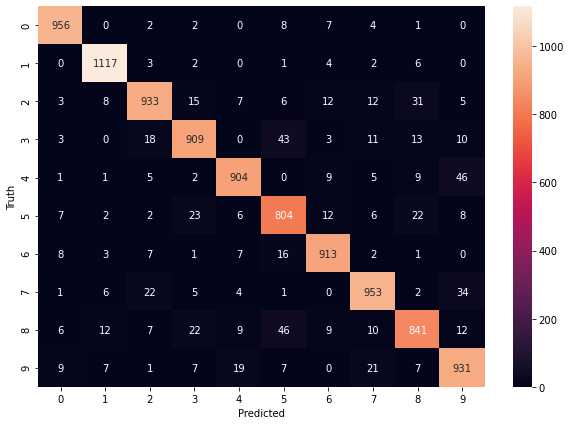

In [12]:
# Draw a confusion matrix for the y_test and y_predicted
y_predicted = model.predict(X_test_flattened)
y_predicted_label = [np.argmax(i) for i in y_predicted ]
plt.figure(figsize=(10,7))
sns.heatmap(tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_label),annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [13]:
# Add a hiiden layer in our model
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4494 - accuracy: 0.8744
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1308 - accuracy: 0.9626
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0897 - accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0670 - accuracy: 0.9796
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0496 - accuracy: 0.9852
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0420 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0318 - accuracy: 0.9901
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0244 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0207 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.018

In [14]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0811 - accuracy: 0.9776


[0.08109867572784424, 0.9775999784469604]

The model improves the accuracy compared to the simple layer version. 

Text(69.0, 0.5, 'Truth')

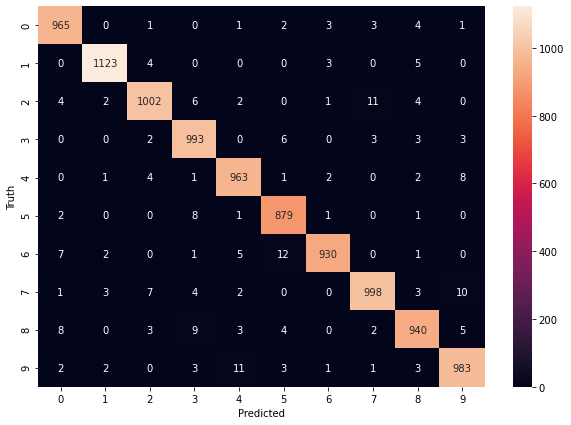

In [15]:
# Again, draw a confusion matrix for the y_test and y_predicted
y_predicted = model.predict(X_test_flattened)
y_predicted_label = [np.argmax(i) for i in y_predicted ]
plt.figure(figsize=(10,7))
sns.heatmap(tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_label),annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')